### Q.11. Analysis the performance of regression models (logistic regression, SVM regression, ANN) on real problem based dataset and evaluate the performances using various parameters.
#### a. Find out he problem, dataset and import it as input. Apply normalization, and feature selection. Check, missing data and handle it, if required.
#### b. Apply all regression model on the dataset and train the system
#### c. Change the parameter of regression model, get the accuracy. Analysis the performance and plot graph of performance/analysis for better understanding.
#### d. Submit one report/article on this analysis.

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
sns.set()
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.exceptions import NotFittedError
from sklearn.metrics import mean_squared_error, mean_absolute_error, plot_confusion_matrix, classification_report
from IPython.display import display
import matplotlib.image as mpimg
import missingno as msno 
np.random.seed(42)
warnings.filterwarnings(action="ignore", message="^internal gelsd")
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier

In [5]:
train_data = pd.read_csv('train.csv')

test_data = pd.read_csv('test.csv')

In [6]:

train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test_data.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


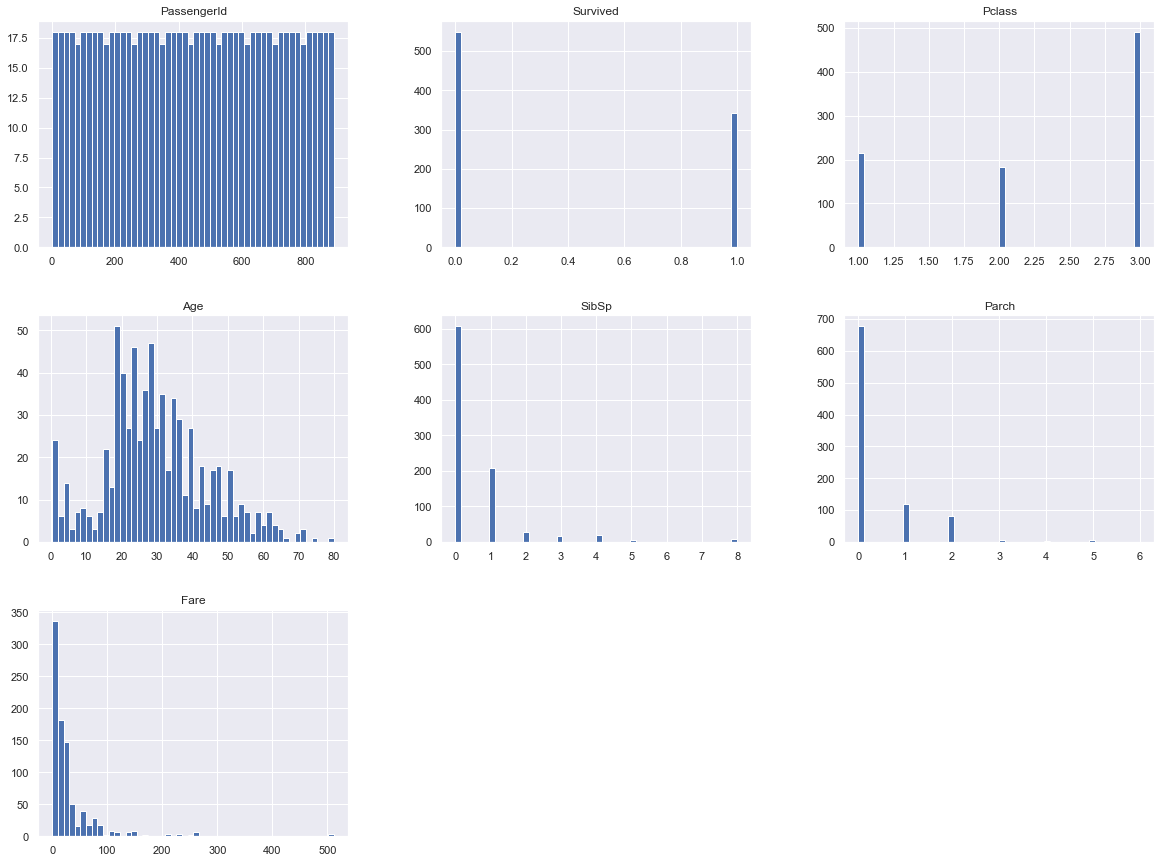

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
train_data.hist(bins=50, figsize=(20,15))
plt.show()


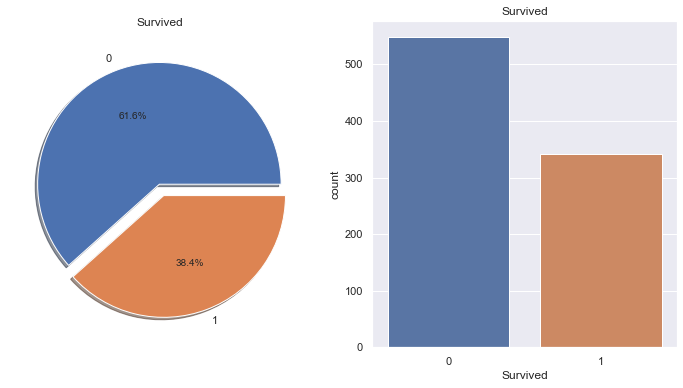

In [11]:
f,ax=plt.subplots(1,2,figsize=(12,6))
train_data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=train_data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=train_data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

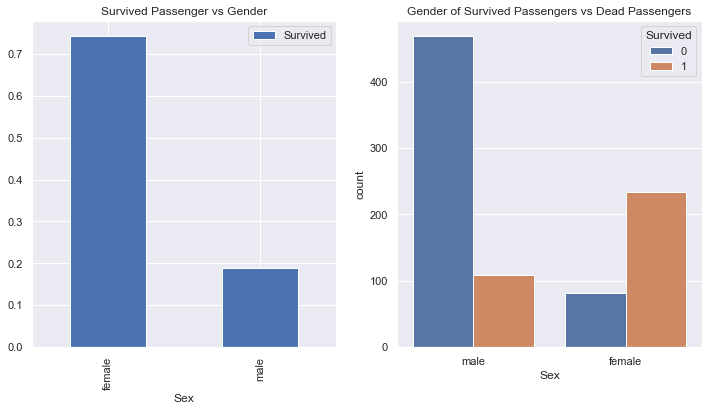

In [12]:
f,ax=plt.subplots(1,2,figsize=(12,6))
train_data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived Passenger vs Gender')
sns.countplot('Sex',hue='Survived',data=train_data,ax=ax[1])
ax[1].set_title('Gender of Survived Passengers vs Dead Passengers')
plt.show()

In [13]:
pd.crosstab(train_data.Pclass,train_data.Survived,margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Text(0.5, 1.0, 'Pclass:Survived vs Dead')

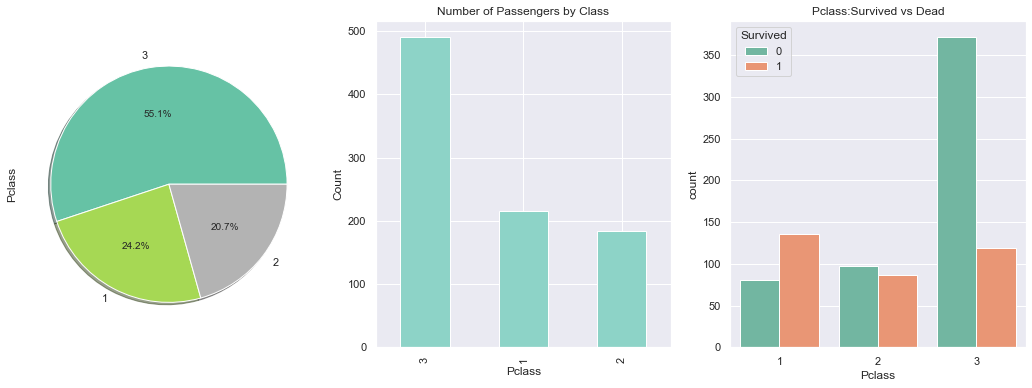

In [14]:
f,ax = plt.subplots(1,3, figsize=(18,6))
train_data['Pclass'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, cmap='Set2')
train_data['Pclass'].value_counts().plot.bar(cmap='Set3',ax=ax[1])
ax[1].set_title('Number of Passengers by Class')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Pclass')
sns.countplot('Pclass', hue='Survived',data= train_data, ax=ax[2], palette='Set2')
ax[2].set_title('Pclass:Survived vs Dead')

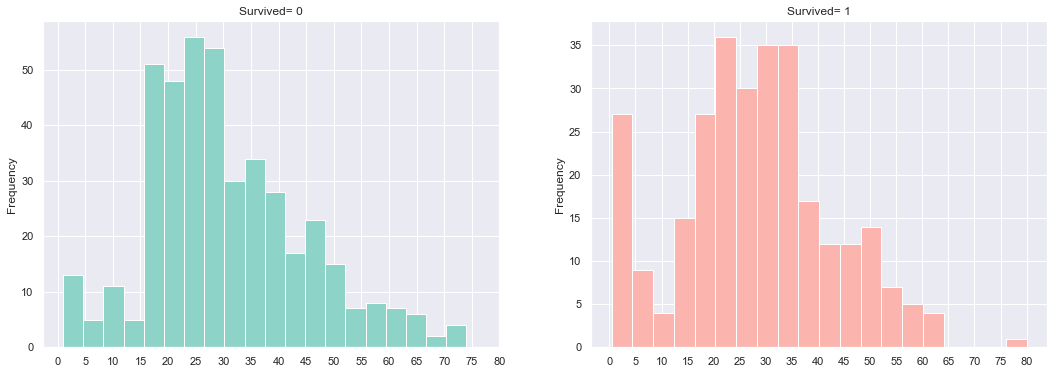

In [15]:
f,ax=plt.subplots(1,2,figsize=(18,6))
train_data[train_data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,cmap='Set3')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
train_data[train_data['Survived']==1].Age.plot.hist(ax=ax[1],bins=20, cmap='Pastel1')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)


plt.show()


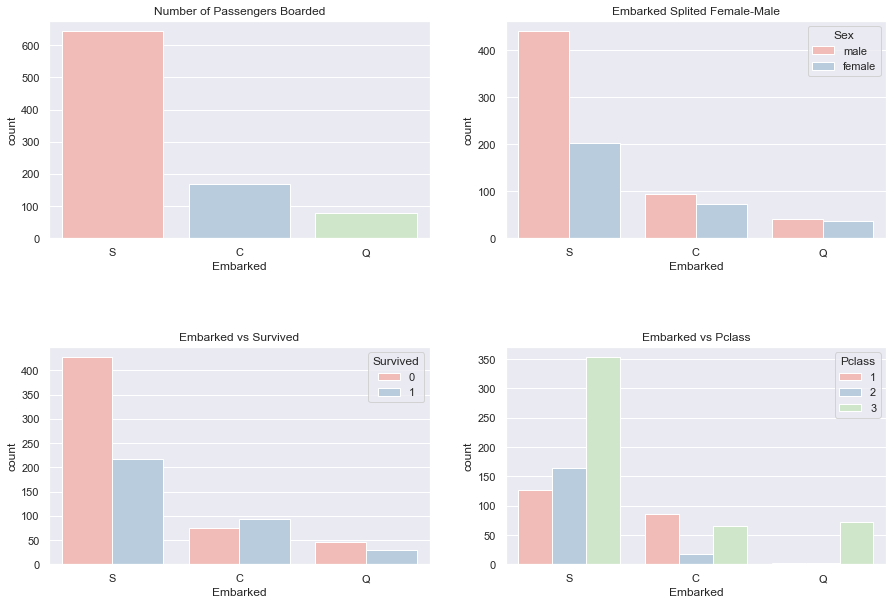

In [16]:
f, ax = plt.subplots(2,2, figsize=(15,10))
sns.countplot('Embarked', data= train_data, ax= ax[0,0], palette='Pastel1')
ax[0,0].set_title('Number of Passengers Boarded')
sns.countplot('Embarked', hue='Sex',data= train_data, ax= ax[0,1], palette='Pastel1')
ax[0,1].set_title('Embarked Splited Female-Male')
sns.countplot('Embarked',hue='Survived', data= train_data, ax= ax[1,0], palette='Pastel1')
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass',data= train_data, ax= ax[1,1], palette='Pastel1')
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [20]:
def missing_data_table(df):
    actual_value = df.isnull().sum().sort_values(ascending=False)
    percentage = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data_from_input = pd.concat([actual_value, percentage], axis=1, keys=['Total', 'Percentage'])
    return missing_data_from_input

In [21]:

missing_data_table(train_data)

,Total,Percentage
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


In [24]:
def preprocess_data(df):
    
    processed_data = df
    
    
    ##to fill the missing values of embarked column as seen above
    processed_data['Embarked'].fillna('C', inplace=True)
    
    ##to fill the missing values of Age by calculating mean
    processed_data['Age'] = processed_data.groupby(['Pclass','Sex','Parch','SibSp'])['Age'].transform(lambda x: x.fillna(x.mean()))
    processed_data['Age'] = processed_data.groupby(['Pclass','Sex','Parch'])['Age'].transform(lambda x: x.fillna(x.mean()))
    processed_data['Age'] = processed_data.groupby(['Pclass','Sex'])['Age'].transform(lambda x: x.fillna(x.mean()))
    
    ## using interpolate function to take care of the missing values in fare column and Cabin colum
    processed_data['Fare'] = processed_data['Fare'].interpolate()
    processed_data['Cabin'].fillna('U', inplace=True)

    ##to create new column name Title from name column
    processed_data['Title'] = pd.Series((name.split('.')[0].split(',')[1].strip() for name in train_data['Name']), index=train_data.index)
    processed_data['Title'] = processed_data['Title'].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    processed_data['Title'] = processed_data['Title'].replace(['Mlle', 'Ms'], 'Miss')
    processed_data['Title'] = processed_data['Title'].replace('Mme', 'Mrs')
    processed_data['Title'] = processed_data['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})
    
     ##to fill the missing values of Age by calculating mean using column Title with same values
    processed_data['Age'] = processed_data.groupby(['Title'])['Age'].transform(lambda x: x.fillna(x.mean()))
    
    ##changing categorical value to numerical value
    processed_data['Sex'] = processed_data['Sex'].map({'male': 0, 'female': 1})
    processed_data['Embarked'] = processed_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
    
    # creating size of the travel group based upon SibSp and Parch
    processed_data['FamillySize'] = processed_data['SibSp'] + processed_data['Parch'] + 1
    processed_data['FamillySize'][processed_data['FamillySize'].between(1, 5, inclusive=False)] = 2
    processed_data['FamillySize'][processed_data['FamillySize']>5] = 3
    processed_data['IsAlone'] = np.where(processed_data['FamillySize']!=1, 0, 1)
    processed_data['IsChild'] = processed_data['Age'] < 18
    processed_data['IsChild'] = processed_data['IsChild'].astype(int)
    
    ##strip the Cabin column to get only the first letter
    processed_data['Cabin'] = processed_data['Cabin'].str[:1]
    processed_data['Cabin'] = processed_data['Cabin'].map({cabin: p for p, cabin in enumerate(set(cab for cab in processed_data['Cabin']))})
    
    ##this new column is to set as 1 or 0 if an other passenger with same ticket is survived
    processed_data['TicketSurvivor'] = pd.Series(0, index=processed_data.index)
    tickets = processed_data['Ticket'].value_counts().to_dict()
    for t, occ in tickets.items():
        if occ != 1:
            table = train_data['Survived'][train_data['Ticket'] == t]
            if sum(table) != 0:
                processed_data['TicketSurvivor'][processed_data['Ticket'] == t] = 1
    

    processed_data = processed_data.drop(['Name', 'Ticket', 'PassengerId'], 1)    
    
    return processed_data

In [25]:
##dividing train test data
train_data_dataframe = train_data.copy()
X = train_data_dataframe.drop(['Survived'], 1)
Y = train_data_dataframe['Survived']

In [26]:
X = preprocess_data(X)

In [27]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Cabin  Embarked  Title  \
0         3    0  22.000000      1      0   7.2500      5         0      1   
1         1    1  38.000000      1      0  71.2833      2         1      3   
2         3    1  26.000000      0      0   7.9250      5         0      2   
3         1    1  35.000000      1      0  53.1000      2         0      3   
4         3    0  35.000000      0      0   8.0500      5         0      1   
..      ...  ...        ...    ...    ...      ...    ...       ...    ...   
886       2    0  27.000000      0      0  13.0000      5         0      5   
887       1    1  19.000000      0      0  30.0000      1         0      2   
888       3    1  14.346939      1      2  23.4500      5         0      2   
889       1    0  26.000000      0      0  30.0000      2         1      1   
890       3    0  32.000000      0      0   7.7500      5         2      1   

     FamillySize  IsAlone  IsChild  TicketSurvivor  
0         

In [28]:
# X = preprocess_data(X)
scale = StandardScaler()
X = pd.DataFrame(scale.fit_transform(X.values), index=X.index, columns=X.columns)
    
# Split dataset for model testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamillySize,IsAlone,IsChild,TicketSurvivor
331,-1.566107,-0.737695,1.181540,-0.474545,-0.473674,-0.074583,-2.000165,-0.571933,-0.707550,-0.670389,0.811922,-0.405840,-0.596795
733,-0.369365,-0.737695,-0.483367,-0.474545,-0.473674,-0.386671,0.285616,-0.571933,-0.707550,-0.670389,0.811922,-0.405840,-0.596795
382,0.827377,-0.737695,0.182596,-0.474545,-0.473674,-0.488854,0.285616,-0.571933,-0.707550,-0.670389,0.811922,-0.405840,-0.596795
704,0.827377,-0.737695,-0.261380,0.432793,-0.473674,-0.490280,0.285616,-0.571933,-0.707550,0.668886,-1.231645,-0.405840,-0.596795
813,0.827377,1.355574,-1.741297,3.154809,2.008933,-0.018709,0.285616,-0.571933,0.263832,2.008162,-1.231645,2.464027,-0.596795


In [29]:
def display_confusion_matrix(target, prediction, score=None):
    cm = metrics.confusion_matrix(target, prediction)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    if score:
        score_title = 'Accuracy Score: {0}'.format(round(score, 5))
        plt.title(score_title, size = 14)
    classification_report = pd.DataFrame.from_dict(metrics.classification_report(target, prediction, output_dict=True), orient='index')
    display(classification_report.round(2))

# Logistic Regression

Accuracy score of logistic regression model is : 0.8268156424581006
Precision score of logistic regression model is : 0.8028169014084507
Recall score of logistic regression model is : 0.7702702702702703
F1 score of logistic regression model is : 0.7862068965517242
MSE_Logistic_regression: 0.1732
RMSE_Logistic_regression: 0.4162
MAE_Logistic_regression: 0.1732


Confusion matrix of logistic regression is : [[91 14]
 [17 57]]


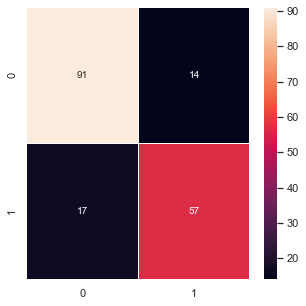

In [30]:
lg = LogisticRegression(solver='lbfgs', random_state=42)
lg.fit(X_train, Y_train)


logistic_prediction = lg.predict(X_test)


accuracy_score_logistic = metrics.accuracy_score(Y_test, logistic_prediction)
precision_score_logistic = precision_score(Y_test, logistic_prediction)
recall_score_logistic = recall_score(Y_test, logistic_prediction)
f1_score_logistic = f1_score(Y_test, logistic_prediction)
# display_confusion_matrix(Y_test, logistic_prediction, score=score)

print("Accuracy score of logistic regression model is :",accuracy_score_logistic)
print("Precision score of logistic regression model is :",precision_score_logistic)
print("Recall score of logistic regression model is :",recall_score_logistic)
print("F1 score of logistic regression model is :",f1_score_logistic)

fig, ax = plt.subplots(figsize=(5,5))         # Sample figsize in inches

mse_logistic_regression =mean_squared_error(Y_test, logistic_prediction)
rmse_log_reg =np.sqrt(mse_logistic_regression)

lin_mae = mean_absolute_error(Y_test, logistic_prediction)


print("MSE_Logistic_regression: %.4f" % mse_logistic_regression)
print("RMSE_Logistic_regression: %.4f" % rmse_log_reg)
print("MAE_Logistic_regression: %.4f" % lin_mae)

confusion_matrix_logistic_regression = confusion_matrix(Y_test, logistic_prediction)

print("\n")
print("Confusion matrix of logistic regression is :",confusion_matrix_logistic_regression)
# sns.heatmap(confusion_matrix_logistic_regression,fmt=".3f", linewidths=.5, square=True)

sns.heatmap(confusion_matrix_logistic_regression, annot=True, linewidths=.5, ax=ax)
plt.show()

# SVM

Accuracy score of SVM model is : 0.8491620111731844
Precision score of SVM model is : 0.873015873015873
Recall score of SVM model is : 0.7432432432432432
F1 score of SVM model is : 0.8029197080291971
SVM_MSE: 0.1508
SVM_rmse: 0.3884
SVM_mae: 0.1508


Confusion matrix of SVM is : [[97  8]
 [19 55]]


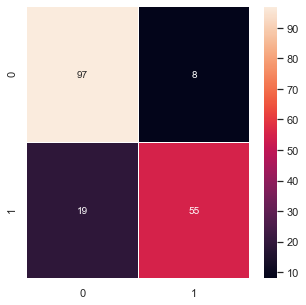

In [32]:
svm = SVC(gamma='auto', random_state=42,probability=True)
svm.fit(X_train, Y_train)
svm_prediction = svm.predict(X_test)

# score = metrics.accuracy_score(Y_test, svm_prediction)
# display_confusion_matrix(Y_test, svm_prediction, score=score)

accuracy_score_svm = metrics.accuracy_score(Y_test, svm_prediction)
precision_score_svm = precision_score(Y_test, svm_prediction)
recall_score_svm = recall_score(Y_test, svm_prediction)
f1_score_svm = f1_score(Y_test, svm_prediction)

print("Accuracy score of SVM model is :", accuracy_score_svm)
print("Precision score of SVM model is :",precision_score_svm)
print("Recall score of SVM model is :",recall_score_svm)
print("F1 score of SVM model is :",f1_score_svm)
SVM_mse =mean_squared_error(Y_test, svm_prediction)
SVM_rmse =np.sqrt(SVM_mse)
SVM_mae = mean_absolute_error(Y_test, svm_prediction)

print("SVM_MSE: %.4f" % SVM_mse)
print("SVM_rmse: %.4f" % SVM_rmse)
print("SVM_mae: %.4f" % SVM_mae)
print("\n")
fig, ax = plt.subplots(figsize=(5,5))         # Sample figsize in inches
confusion_matrix_SVM = confusion_matrix(Y_test, svm_prediction)

print("Confusion matrix of SVM is :",confusion_matrix_SVM)
# sns.heatmap(confusion_matrix_logistic_regression,fmt=".3f", linewidths=.5, square=True)
sns.heatmap(confusion_matrix_SVM, annot=True, linewidths=.5, ax=ax)
plt.show()

# ANN

In [46]:
def build_ann(optimizer):
    
    ann = Sequential()
    
    # input layer
    ann.add(Dense(units=32, kernel_initializer='glorot_uniform', activation='relu', input_shape=(13,)))
    
    # hidden layer
    ann.add(Dense(units=64, kernel_initializer='glorot_uniform', activation='relu'))
    ann.add(Dropout(rate=0.5))
    ann.add(Dense(units=64, kernel_initializer='glorot_uniform', activation='relu'))
    ann.add(Dropout(rate=0.5))
    
    # output layer
    ann.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))
    
    # Compile the model
    ann.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return ann

In [48]:
import tensorflow 


from tensorflow import keras
import tensorflow.keras


In [49]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D

import numpy as np

In [50]:
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras import layers
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image


In [51]:

opt = tf.optimizers.Adam(lr=0.001)
ann = build_ann(opt)
# Training the ANN
history = ann.fit(X_train, Y_train, batch_size=16, epochs=30, validation_data=(X_test, Y_test))

Epoch 1/30
45/45 [==============================] - 4s 15ms/step - loss: 0.6495 - accuracy: 0.6250 - val_loss: 0.5285 - val_accuracy: 0.7486
Epoch 2/30
45/45 [==============================] - 0s 7ms/step - loss: 0.5338 - accuracy: 0.7430 - val_loss: 0.4651 - val_accuracy: 0.7933
Epoch 3/30
45/45 [==============================] - 0s 7ms/step - loss: 0.5063 - accuracy: 0.7823 - val_loss: 0.4316 - val_accuracy: 0.7989
Epoch 4/30
45/45 [==============================] - 0s 7ms/step - loss: 0.4519 - accuracy: 0.8034 - val_loss: 0.4152 - val_accuracy: 0.8101
Epoch 5/30
45/45 [==============================] - 0s 7ms/step - loss: 0.4452 - accuracy: 0.8272 - val_loss: 0.4005 - val_accuracy: 0.8212
Epoch 6/30
45/45 [==============================] - 0s 7ms/step - loss: 0.4226 - accuracy: 0.8315 - val_loss: 0.3932 - val_accuracy: 0.8380
Epoch 7/30
45/45 [==============================] - 0s 6ms/step - loss: 0.4361 - accuracy: 0.8244 - val_loss: 0.3892 - val_accuracy: 0.8380
Epoch 8/30
45/45 [=

Accuracy score of Artificial Neural Network is : 0.8268156424581006
Precision score of Artificial Neural Network is : 0.8412698412698413
Recall score of Artificial Neural Network is : 0.7162162162162162
F1 score of Artificial Neural Network is : 0.7737226277372262
Artificial Neural Network_MSE: 0.1732
Artificial Neural Network_RMSE: 0.4162
Artificial Neural Network_MAE: 0.1732


Confusion matrix of Artificial Neural Network is : [[95 10]
 [21 53]]


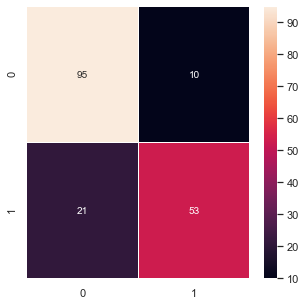

In [52]:
ann_prediction = ann.predict(X_test)
ann_prediction = (ann_prediction > 0.5) # convert probabilities to binary output

accuracy_score_ann = metrics.accuracy_score(Y_test, ann_prediction)
precision_score_ann = precision_score(Y_test, ann_prediction)
recall_score_ann = recall_score(Y_test, ann_prediction)
f1_score_ann = f1_score(Y_test, ann_prediction)

print("Accuracy score of Artificial Neural Network is :",accuracy_score_ann)
print("Precision score of Artificial Neural Network is :",precision_score_ann)
print("Recall score of Artificial Neural Network is :",recall_score_ann)
print("F1 score of Artificial Neural Network is :",f1_score_ann)


ann_mse =mean_squared_error(Y_test, ann_prediction)
ann_rmse=np.sqrt(ann_mse)
ann_lin_mae = mean_absolute_error(Y_test, ann_prediction)

print("Artificial Neural Network_MSE: %.4f" % ann_mse)
print("Artificial Neural Network_RMSE: %.4f" % ann_rmse)
print("Artificial Neural Network_MAE: %.4f" % ann_lin_mae)

print("\n")

fig, ax = plt.subplots(figsize=(5,5)) 
confusion_matrix_Ann = confusion_matrix(Y_test, ann_prediction)

print("Confusion matrix of Artificial Neural Network is :",confusion_matrix_Ann)
sns.heatmap(confusion_matrix_Ann, annot=True, linewidths=.5, ax=ax)
plt.show()